## TITANIC DATASETS

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('../train.csv')

In [3]:
test = pd.read_csv('../test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape


(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### EDA Starts Here

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### barchart with catagorical data
<ul>
    <li>Pclass </li>
    <li>Sex </li>
    <li>SibSp </li>
    <li>Parch</li>
    <li>Embarked </li>
    <li>Cabin </li>
</ul>

In [10]:
def barchart(feature): 
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    #creating new data frame
    df = pd.DataFrame([survived,dead])
    df.index=['survived','dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))
    

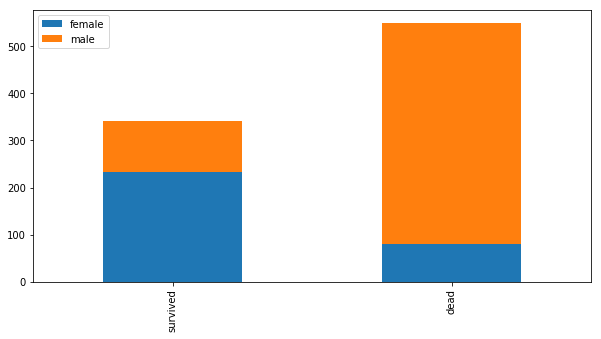

In [11]:
barchart('Sex') ## the survive and dead based on sex

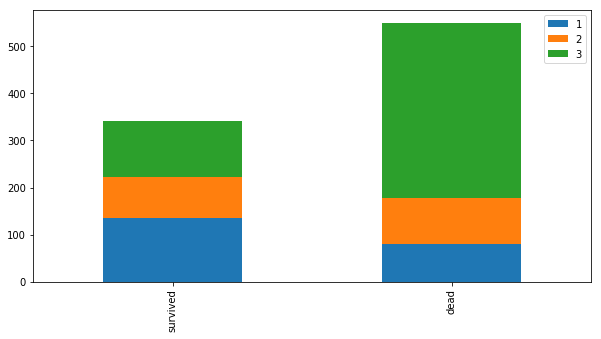

In [12]:
barchart('Pclass')

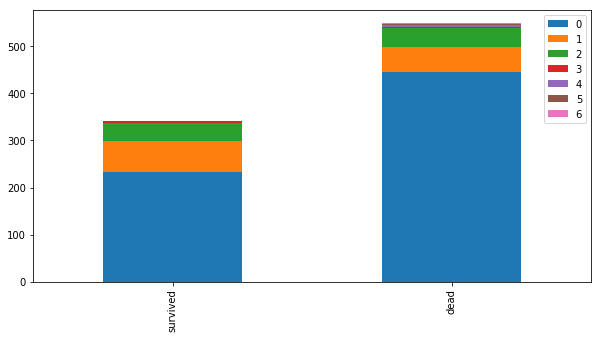

In [13]:
barchart('Parch')

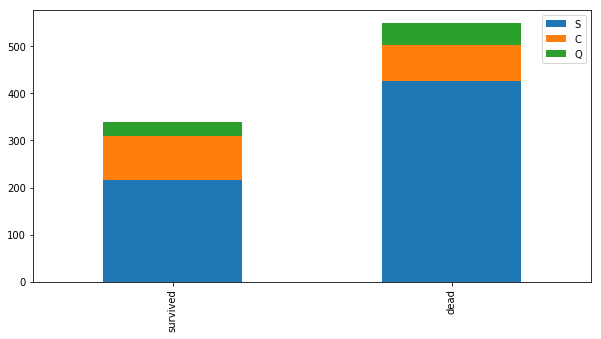

In [14]:
barchart('Embarked')

In [15]:
## mapping the sex with number
sex_mapping = {'male':0,'female':1}
train['Sex'] = train['Sex'].map(sex_mapping)

In [16]:
test['Sex'] = test['Sex'].map(sex_mapping)

In [17]:
train_test_data = [train,test]

In [18]:
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr


In [20]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Title, dtype: int64

In [21]:
title_maping = {'Mr':0,'Miss':1,'Mrs':2,'Master' :3,'Dr':3,'Rev':3,'Col':3,'Major':3,'Mlle':3,'Countess':3,'Ms':3,'Lady':3,'Jonkheer':3,'Don':3,'Mme':3,'Capt':3,'Sir':3 }      

In [22]:
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_maping)

In [23]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [24]:
## see the cell after 2 cell then use the 
##command to the fillna function with inplace=True

In [25]:
train['Age'].fillna(train.groupby("Title")['Age'].transform('median'),inplace=True)

In [26]:
test['Age'].fillna(test.groupby("Title")['Age'].transform('median'),inplace=True)

In [27]:
train.groupby("Title")['Age'].transform("median")
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


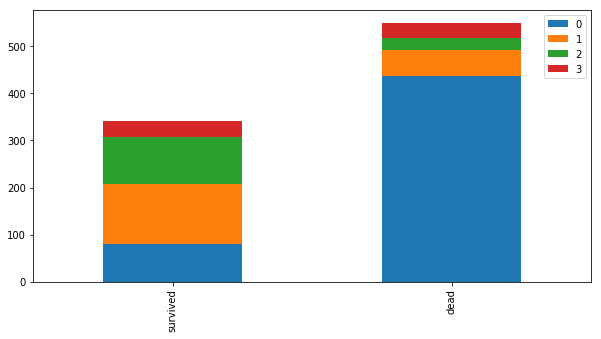

In [28]:
barchart('Title')

In [29]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [30]:
pd.crosstab([train.Sex,train.Survived],train.Pclass)

Pclass         1   2    3
Sex Survived             
0   0         77  91  300
    1         45  17   47
1   0          3   6   72
    1         91  70   72

## Machine Learning algorithm starts Here

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [33]:
train=train.drop('Ticket',1)
train=train.drop('Cabin',1)


In [34]:
e_map={'S':1,'C':2,'Q':3}
train['Embarked']=train['Embarked'].map(e_map)

In [35]:
train['Embarked']=train['Embarked'].fillna(0)

In [36]:
## extract the data for x and y
x=np.array(train.drop('Survived',1))

In [37]:
y=np.array(train['Survived'])

In [38]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [39]:
MachineLearningAlgo=[]

In [40]:
X=['LinearSVC','DecisionTreeClassifier','KNeighborsClassifier','SVC','GradientBoostingClassifier']

In [41]:
Z=[LinearSVC(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GradientBoostingClassifier()]

In [45]:
for model in Z:
    model.fit(X_train,y_train)
    accuracy=model.score(X_test,y_test)
    MachineLearningAlgo.append(accuracy)
    

In [46]:
MachineLearningAlgo

[0.7835820895522388,
 0.7910447761194029,
 0.6529850746268657,
 0.6194029850746269,
 0.8171641791044776]

In [47]:
d={'Accuracy':MachineLearningAlgo,'Algorithm':X}
df=pd.DataFrame(d)

In [48]:
df

,Accuracy,Algorithm
0,0.783582,LinearSVC
1,0.791045,DecisionTreeClassifier
2,0.652985,KNeighborsClassifier
3,0.619403,SVC
4,0.817164,GradientBoostingClassifier
